Source: https://www.itl.nist.gov/div898/handbook/eda/section4/eda4.htm

## Preparation

In [1]:
import os
os.chdir("..")
os.getcwd()

'C:\\Users\\An PC\\jupyter\\eda'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

from utils import datasets
from utils import calculations
from utils.plotting import show_and_save_plot
from plots import four_plot, run_sequence_plot, histogram, lag_plot, probability_plot, \
                  autocorrelation_plot

---

# Normal Random Numbers

This example illustrates the univariate analysis of a set of normal random numbers.
1. Background and Data
2. Graphical Output and Interpretation
3. Quantitative Output and Interpretation

---

## Background and Data
### Generation 
The normal random numbers used in this case study are from a Rand Corporation publication.

The motivation for studying a set of normal random numbers is to illustrate the ideal case where all four underlying assumptions hold.
### Data source
https://www.itl.nist.gov/div898/handbook/datasets/RANDN.DAT

In [3]:
df = datasets.load_normal_random_numbers()
df.head()

,y
0,-1.276
1,-1.218
2,-0.453
3,-0.350
4,0.723


---

## Graphical Output and Interpretation
### Goal
The goal of this analysis is threefold:
1. Determine if the univariate model: $Y_i=C+E_i$ is appropriate and valid.
2. Determine if the typical underlying assumptions for an "in control" measurement process are valid. These assumptions are:
    * random drawings;
    * from a fixed distribution;
    * with the distribution having a fixed location; and
    * the distribution having a fixed scale. 
3. Determine if the confidence interval $\bar{Y}\pm\frac{2s}{\sqrt{N}}$ is appropriate and valid where $s$ is the standard deviation of the original data.

### 4-Plot of Data

In [4]:
def four_plot(series, main_title="4-PLOT", show=True, save=False,
              run_kws=None, lag_kws=None, hist_kws=None, prob_kws=None):

    fig, axes = plt.subplots(nrows=2, ncols=2,
                             gridspec_kw={
                                 "left": 0.1, "right": 0.98,
                                 "top": 0.9, "bottom": 0.1,
                                 "wspace": 0.3, "hspace": 0.3,
                                 },
                             figsize=(7, 8))
    rsp, lag = axes[0]
    hist, prob = axes[1]
    
    # Run Sequence Plot
    run_kws = run_kws if run_kws is not None else {}
    clearance = (max(series)-min(series)) * 1/10
    y_lim = (min(series)-clearance, max(series)+clearance)
    run_sequence_plot(series, y_lim=y_lim, ax=rsp, show=False, **run_kws)

    # Lag Plot
    lag_kws = lag_kws if lag_kws is not None else {}
    lag_plot(series, ax=lag, show=False, **lag_kws)
    
    # Histogram
    hist_kws = hist_kws if hist_kws is not None else {}
    histogram(series, ax=hist, show=False, **hist_kws)

    # Probability Plot
    prob_kws = prob_kws if prob_kws is not None else {}
    probability_plot(series, ax=prob, show=False, **prob_kws)
    
    fig.suptitle(main_title)
    
    show_and_save_plot(show=show, save=save, filename="4-plot.png")

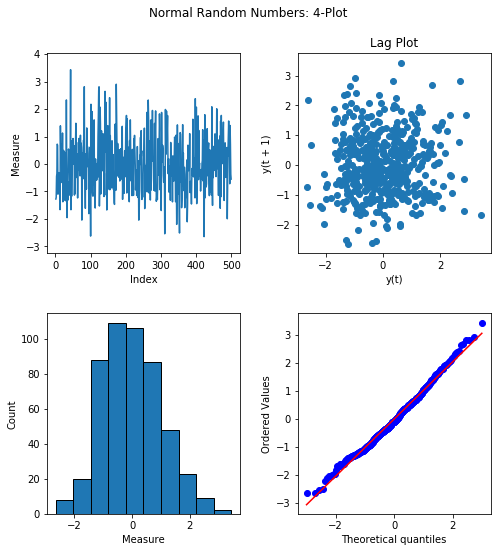

In [5]:
four_plot(df["y"], main_title="Normal Random Numbers: 4-Plot")

### Interpretation
The assumptions are addressed by the graphics shown above:
1. The run sequence plot (upper left) indicates that the data do not have any significant shifts in location or scale over time. The run sequence plot does not show any obvious outliers.
2. The lag plot (upper right) does not indicate any non-random pattern in the data.
3. The histogram (lower left) shows that the data are reasonably symmetric, there do not appear to be significant outliers in the tails, and that it is reasonable to assume that the data are from approximately a normal distribution.
4. The normal probability plot (lower right) verifies that an assumption of normality is in fact reasonable. 

From the above plots, we conclude that the underlying assumptions are valid and the data follow approximately a normal distribution. Therefore, the confidence interval form given previously is appropriate for quantifying the uncertainty of the population mean. The numerical values for this model are given in the Quantitative Output and Interpretation section. 

### Individual Plots
Although it is usually not necessary, the plots can be generated individually to give more detail. 

#### Run Sequence Plot

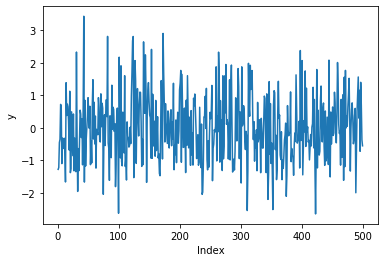

In [6]:
run_sequence_plot(df["y"], y_label="y")

#### Lag Plot

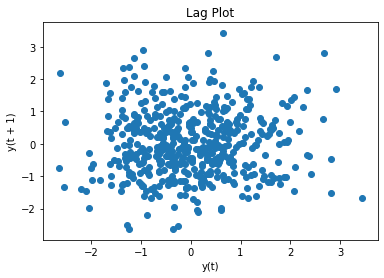

In [7]:
lag_plot(df["y"])

#### Histogram (with overlaid Normal PDF)

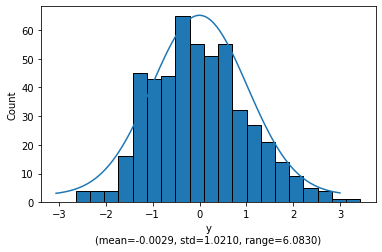

(-0.002936000000000014, 1.0210411813889704, 6.083)

In [8]:
histogram(df["y"], bins=20, x_label="y", plot_pdf=True, show_statistics=True)

#### Normal Probability Plot 

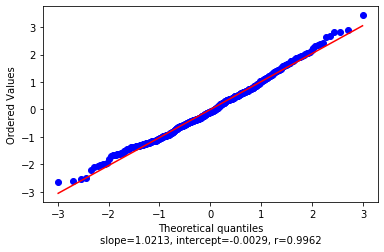

In [9]:
_, _ = probability_plot(df["y"], show_fitting=True)

---

## Quantitative Output and Interpretation

### Summary Statistics
As a first step in the analysis, common summary statistics are computed from the data.

In [10]:
df.describe()

,y
count,500.000000
mean,-0.002936
std,1.021041
min,-2.647000
25%,-0.720500
50%,-0.093000
75%,0.644750
max,3.436000


### Location
One way to quantify a change in location over time is to fit a straight line to the data using an index variable as the independent variable in the regression. For our data, we assume that data are in sequential run order and that the data were collected at equally spaced time intervals. In our regression, we use the index variable $X = 1, 2, ..., N$, where $N$ is the number of observations. If there is no significant drift in the location over time, the slope parameter should be zero. 

In [11]:
Y = df["y"]
X = df.index.values + 1
X = sm.add_constant(X)

In [12]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01566
Date:                Sun, 29 Sep 2019   Prob (F-statistic):              0.900
Time:                        11:44:40   Log-Likelihood:                -719.37
No. Observations:                 500   AIC:                             1443.
Df Residuals:                     498   BIC:                             1451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.092      0.076      0.9

In [13]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [14]:
SSR = np.sqrt(results.mse_resid)
print("Residual Standard Deviation =", SSR)
print("Residual Degrees of Freedom =", results.df_resid)

Residual Standard Deviation = 1.0220497382608675
Residual Degrees of Freedom = 498.0


The absolute value of the *t*-value for the slope parameter is smaller than the critical value of $t_{0.975, 498} = 1.96$. Thus, we conclude that the slope is not different from zero at the 0.05 significance level.

### Variation
One simple way to detect a change in variation is with __Bartlett's test__, after dividing the data set into several equal-sized intervals. The choice of the number of intervals is somewhat arbitrary, although values of four or eight are reasonable. We will divide our data into four intervals.

In [15]:
Y = df["y"]
G1, G2, G3, G4 = Y[:125], Y[125:250], Y[250:375], Y[375:]
for G in (Y, G1, G2, G3, G4):
    print(len(G))

500
125
125
125
125


Null and alternative hypothesis

$H_0$:  $\sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$

$H_a$:  At least one $\sigma_i^2$ is not equal to the others.

In [16]:
T, p_value = stats.bartlett(G1, G2, G3, G4)
print("Test statistic =", T)
print("p-value =", p_value)

Test statistic = 2.37366925157454
p-value = 0.49855490294290494


In this case, Bartlett's test indicates that the variances are not significantly different in the four intervals.

### Randomness
There are many ways in which data can be non-random. However, most common forms of non-randomness can be detected with a few simple tests including the lag plot shown on the previous section.

Another check is an autocorrelation plot that shows the autocorrelations for various lags. Confidence bands can be plotted at the 95% and 99% confidence levels. Points outside this band indicate statistically significant values (lag 0 is always 1). 

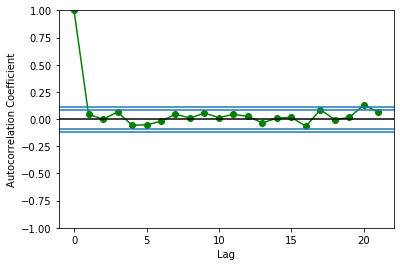

lag = 0, autocorrelation coefficient = 1.000
lag = 1, autocorrelation coefficient = 0.045
lag = 2, autocorrelation coefficient = -0.002
lag = 3, autocorrelation coefficient = 0.065
lag = 4, autocorrelation coefficient = -0.056


In [17]:
coefs, _, _ = autocorrelation_plot(df["y"], max_lag=21, c="green", marker="o")
for lag, coef in enumerate(coefs[:5]):
    print("lag = {}, autocorrelation coefficient = {:.3f}".format(lag, coef))

The lag 1 autocorrelation, which is generally the one of most interest, is 0.045. The critical values at the 5% significance level are -0.087 and 0.087. Since 0.045 is within the critical region, the lag 1 autocorrelation is not statistically significant, so there is no evidence of non-randomness.

A common test for randomness is the __Bardley runs test__.

*Hypotheses*

>$H_0$:  the sequence was produced in a random manner
>
>$H_a$:  the sequence was not produced in a random manner

*Results*

> Test statistic: $Z = -1.0744$
>
> Significance level: $\alpha = 0.05$
>
> Critical value: $Z_{1-\frac{\alpha}{2}} = 1.96$
>
> Critical region:  Reject $H_0$ if $|{Z}| \gt 1.96$ 

The runs test fails to reject the null hypothesis that the data were produced in a random manner. 

### Distributional Analysis
Probability plots are a graphical test for assessing if a particular distribution provides an adequate fit to a data set.

A quantitative enhancement to the probability plot is the correlation coefficient of the points on the probability plot, or PPCC. For this data set the PPCC based on a normal distribution is 0.996. Since the PPCC is greater than the critical value of 0.987 (this is a tabulated value), the normality assumption is not rejected.

In [18]:
_, results = stats.probplot(df["y"])
slope, intercept, r = results
print("PPCC =", r)

PPCC = 0.9961726948845886


Chi-square and Kolmogorov-Smirnov goodness-of-fit tests are alternative methods for assessing distributional adequacy. The Wilk-Shapiro and Anderson-Darling tests can be used to test for normality. The results of the Anderson-Darling test follow.

In [19]:
statistic, critical_values, significance_levels = stats.anderson(df["y"])
print("AD statistic =", statistic)
for level, crit in zip(significance_levels, critical_values):
    print("Critical value = {} at significance level = {}".format(crit, level))

AD statistic = 1.0612366824637434
Critical value = 0.571 at significance level = 15.0
Critical value = 0.651 at significance level = 10.0
Critical value = 0.781 at significance level = 5.0
Critical value = 0.911 at significance level = 2.5
Critical value = 1.083 at significance level = 1.0


The Anderson-Darling test rejects the normality assumption at the 0.05 significance level.

### Outlier Analysis
A test for outliers is the __Grubbs test__.

*Hypotheses*

>$H_0$: there are no outliers in the data
>
>$H_a$: the maximum value is an outlier

*Results*

>Test statistic:  $G = 3.368068$
>
>Significance level: $\alpha = 0.05$
>
>Critical value for an upper one-tailed test: $G_{crit}=3.863087$
>
>Critical region: Reject $H_0$ if $G\gt3.863087$

For this data set, Grubbs' test does not detect any outliers at the 0.05 significance level. 

In [20]:
!pip install outlier_utils
from outliers import smirnov_grubbs as grubbs

In [21]:
outliers = grubbs.max_test_outliers(df["y"], alpha=0.05)
if len(outliers) == 0:
    print("The maximum value is not an outlier.")
else:
    print("Outliers:", outliers)

The maximum value is not an outlier.


c:\users\an pc\jupyter\.venv\lib\site-packages\outliers\smirnov_grubbs.py:185: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return data.argmax()


### Model
Since the underlying assumptions were validated both graphically and analytically, we conclude that a reasonable model for the data is: $Y_i = C + E_i$, where $C$ is the estimated value of the mean, $-0.00294$. We can express the uncertainty for $C$ as a 95% confidence interval $(-0.09266, 0.08678)$. 

### Univariate Report
It is sometimes useful and convenient to summarize the above results in a report.

#### Analysis of 500 normal random numbers

1. Sample Size                           = 500


2. Location
    * Mean                                  = -0.00294
    * Standard Deviation of Mean            = 0.045663
    * 95% Confidence Interval for Mean      = (-0.09266,0.086779)
    * Drift with respect to location?       = NO
  
  
3. Variation
    * Standard Deviation                    = 1.021042
    * 95% Confidence Interval for SD        = (0.961437, 1.088585)
    * Drift with respect to variation? (based on Bartletts test on quarters of the data) = NO
  
  
4. Data are Normal?
    *    (as tested by Normal PPCC)         = YES
    *    (as tested by Anderson-Darling)    = NO
  
  
5. Randomness
    * Autocorrelation                       = 0.045059
    * Data are Random? (as measured by autocorrelation) = YES


6. Statistical Control (i.e., no drift in location or scale, data are random, distribution is fixed, here we are testing only for fixed normal)
    * Data Set is in Statistical Control?   = YES
  
  
7. Outliers? (as determined by Grubbs' test) = NO

---